In [1]:
import numpy as np
import matplotlib.pyplot as plt

# DATA SETUP: DO NOT EDIT

In [140]:
np.random.seed(0)
N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))

## Number of Samples

In [141]:
X.shape

(1998, 2)

## Visualising Data

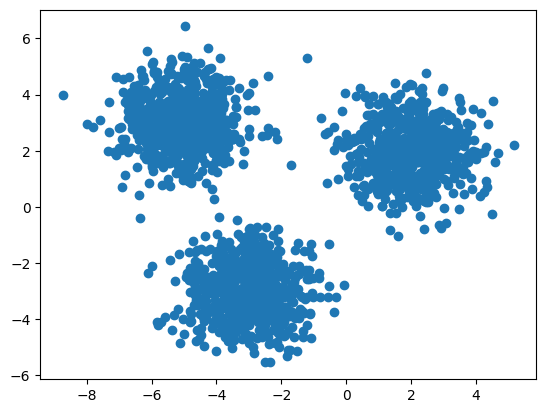

In [142]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## Initializing cluster centers

In [143]:
k = 3 
center_indices = np.array([200, 800, 1200])
centers = X[center_indices]

## Visualizing cluster centers

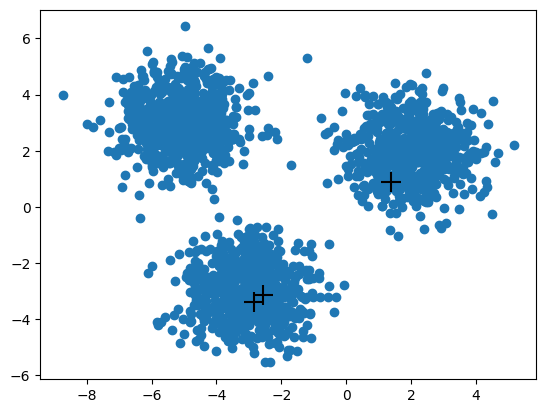

In [144]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers[:,0], centers[:,1], marker = '+', color = 'black', s = 200)
plt.show()

## Assigning initial cluster centers

In [145]:
def assign_clusters(X, k, cluster_centers):
    z = np.array([])
    for point in X:
        dist_from_centers = [np.linalg.norm(cluster_centers[i] - point) for i in range(k)]
        z = np.append(z, np.argmin(dist_from_centers))
    return z

In [146]:
z = assign_clusters(X, k, centers)

## Mean of initial cluster assignment vector

In [147]:
print(np.mean(z))

0.7107107107107107


## Visualising data after initial cluster assignment

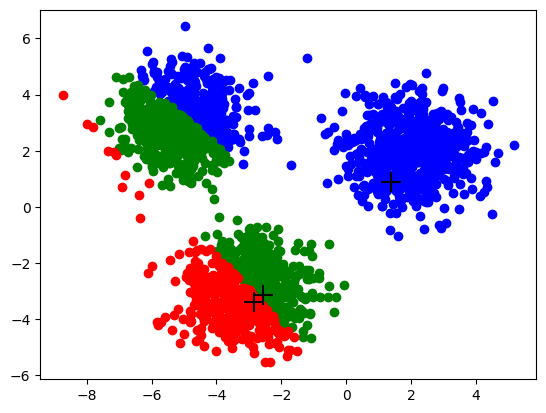

In [148]:
colors = ['blue', 'green', 'red']
k_array = [0,1,2]
for cluster, color in zip(k_array, colors):
    relevant_points = X[z == cluster]
    plt.scatter(relevant_points[:,0], relevant_points[:,1], color = color)
plt.scatter(centers[:,0], centers[:,1], marker = '+', color = 'black', s = 200)

In [149]:
print(np.mean(X[z == 0], axis = 0))
print(np.mean(X[z == 1], axis = 0))
print(np.mean(X[z == 2], axis = 0))

[0.15243752 2.47002787]
[-4.09339723  0.26891354]
[-3.71658966 -3.31569723]


## Updated Cluster Centers

In [150]:
def compute_cluster_centers(X,z,k):
    final = np.array([np.mean(X[z == i], axis = 0) for i in range(k)])
    return final

In [151]:
updated = compute_cluster_centers(X,z,3)

In [152]:
print(updated)

[[ 0.15243752  2.47002787]
 [-4.09339723  0.26891354]
 [-3.71658966 -3.31569723]]


In [153]:
print(np.mean(updated, axis = 0))

[-2.55251646 -0.19225194]


In [154]:
print(np.unique(z))

[0. 1. 2.]


### Converges in 3rd iteration

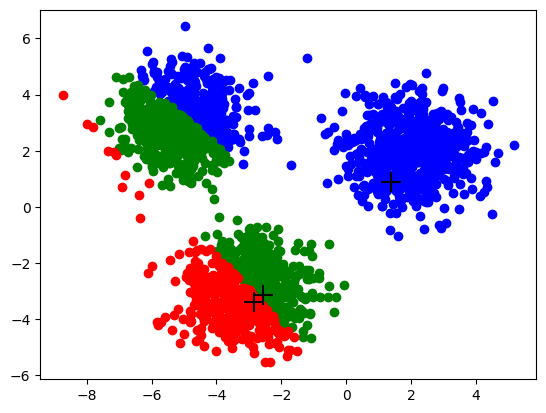

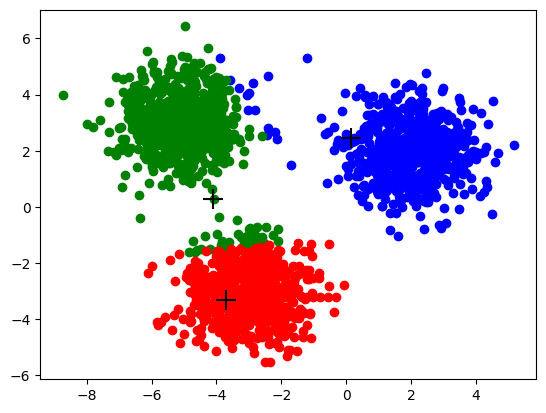

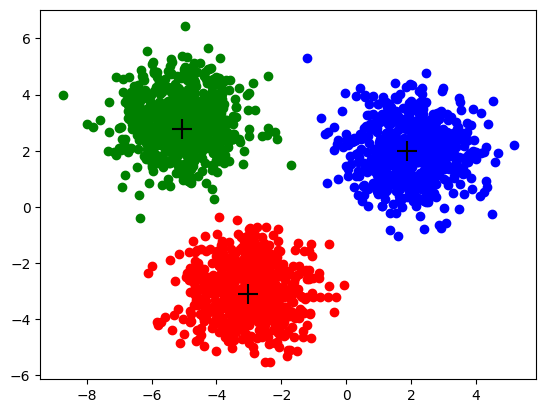

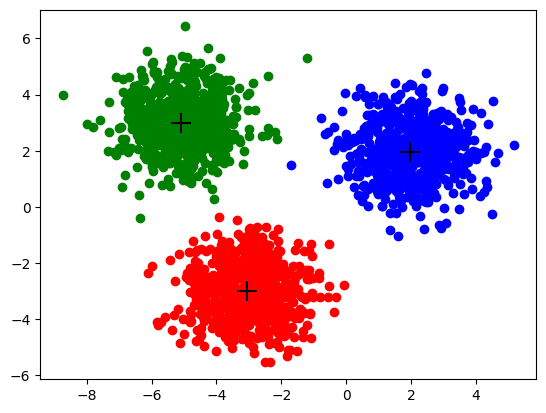

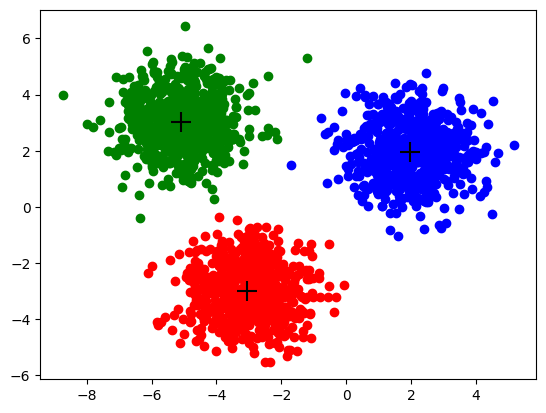

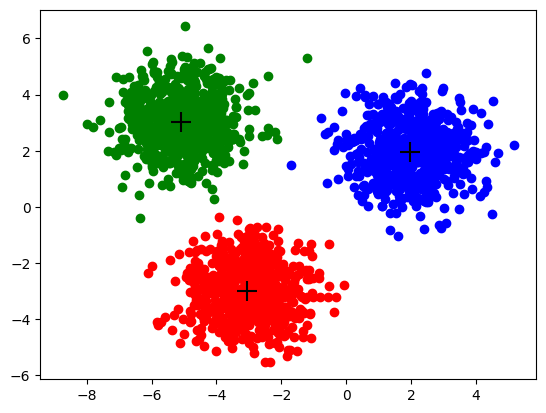

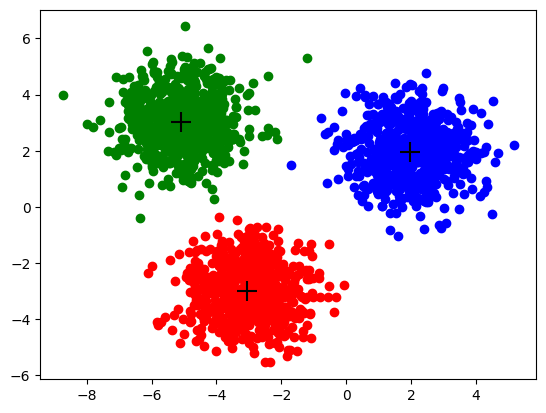

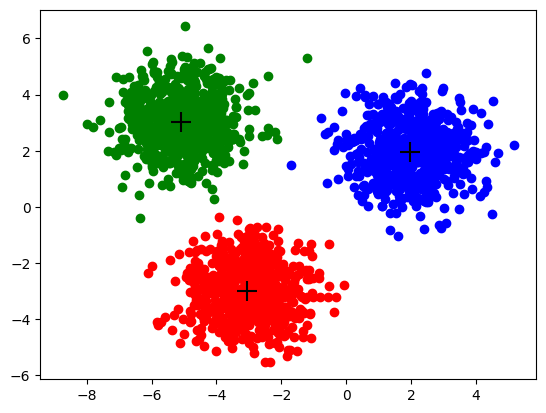

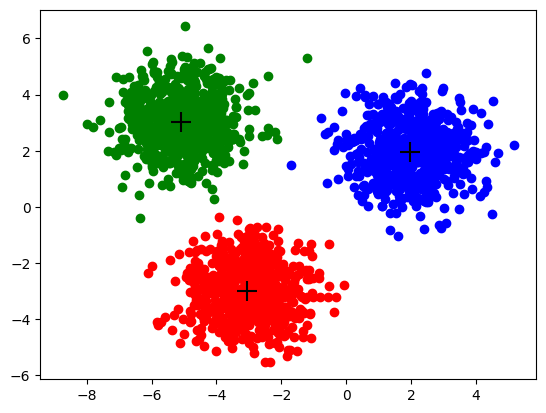

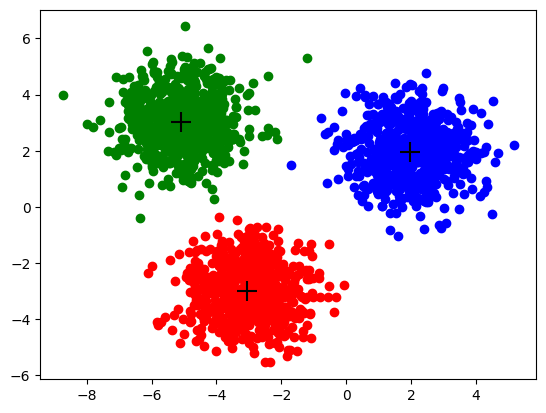

In [155]:
for i in range(10):
    z = assign_clusters(X, k, centers)
    colors = ['blue', 'green', 'red']
    k_array = [0,1,2]
    for cluster, color in zip(k_array, colors):
        relevant_points = X[z == cluster]
        plt.scatter(relevant_points[:,0], relevant_points[:,1], color = color)
    plt.scatter(centers[:,0], centers[:,1], marker = '+', color = 'black', s = 200)
    plt.show()
    centers = compute_cluster_centers(X,z,k)
    